In [67]:
# Import standard packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# additional packages
from statsmodels.formula.api import logit # logistic regression for predicting a dichotomous response variable

import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy import stats

plt.rc('figure', figsize=(14,6))
plt.rc('font', size=14)

In [2]:
# Load Data
fn = '/Users/ad/Documents/Exercises/signage_survey/data/Signage2015Format.csv'
df = pd.read_csv(fn)

In [3]:
# Map Sign Attributes
df['illuminated'] = df['Illuminati'].map({'Yes': 1, 'No': 0})
df['signs'] = df['sign'].map({'bndrywll': 1, 'cnopy': 2, 'flatsgn': 3, 'projctng': 4})
df.head()

,Erfnumber,sign,Illuminati,1st,3rd,Height,Width,Area,NumberofSi,NrofSidesT,...,TenantName,Encroachme,1stParty,3rdParty,Approximat,DateCreate,DateUpdate,hae,illuminated,signs
0,94836,flatsgn,Yes,No,Yes,20.0,15.0,300.00,1.0,1,...,McDonalds,Yes Certain,McDonalds,H&M,80.0,2015-10-14T13:31:53Z,NaN,71.087371,1,3
1,94836,flatsgn,Yes,Yes,No,1.0,1.0,1.00,1.0,1,...,NaN,Yes Certain,McDonalds,NaN,100.0,2015-10-14T13:40:45Z,NaN,64.681593,1,3
2,94836,flatsgn,Yes,No,Yes,15.0,10.0,150.00,1.0,1,...,NaN,Yes Certain,McDonalds,Little Dragon,100.0,2015-10-14T13:52:46Z,NaN,64.022530,1,3
3,96236,flatsgn,Yes,Yes,No,0.3,4.0,1.20,1.0,1,...,NaN,Yes Certain,Dark Paradise,NaN,100.0,2015-10-14T14:09:00Z,NaN,62.453141,1,3
4,96236,flatsgn,No,Yes,No,0.5,1.5,0.75,1.0,1,...,Indie,Yes Certain,Indie,NaN,50.0,2015-10-14T14:13:02Z,NaN,61.440801,0,3


# Logit Regression Model

In [4]:
# Logit Regression Model
formula = 'illuminated ~ sign + Height + Width + Area'
logit_model = smf.logit(formula, data=df).fit()
print(logit_model.summary())
print('Exponentiated Parameters:\n', np.exp(logit_model.params))

Optimization terminated successfully.
         Current function value: 0.573970
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:            illuminated   No. Observations:                  192
Model:                          Logit   Df Residuals:                      185
Method:                           MLE   Df Model:                            6
Date:                Sat, 11 Jun 2022   Pseudo R-squ.:                  0.1703
Time:                        12:22:14   Log-Likelihood:                -110.20
converged:                       True   LL-Null:                       -132.82
Covariance Type:            nonrobust   LLR p-value:                 4.188e-08
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.5039      0.815     -1.845      0.065      -3.102       0.094
sign[T.cno

The odds of selecting the illuminated option increase by a factor of 31.217 when a flat sign is chosen. Conversely, the odds of an illuminated sign are multiplied by a factor of 0.548 for every increase in height—as is the case for width. Hence the odds of selecting the illuminated option increase with a flat sign, and decreases with an increase of height and width. Because the predictor variable can't equal 0 the intercept isn't meaningfull in this case (Kabacoff, 2011, pp 321).

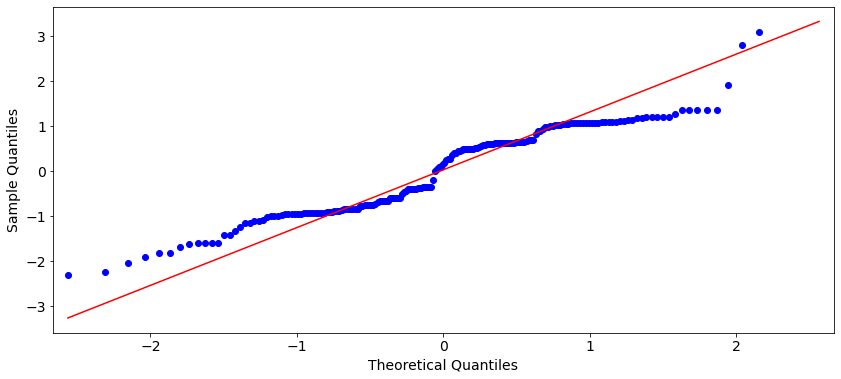

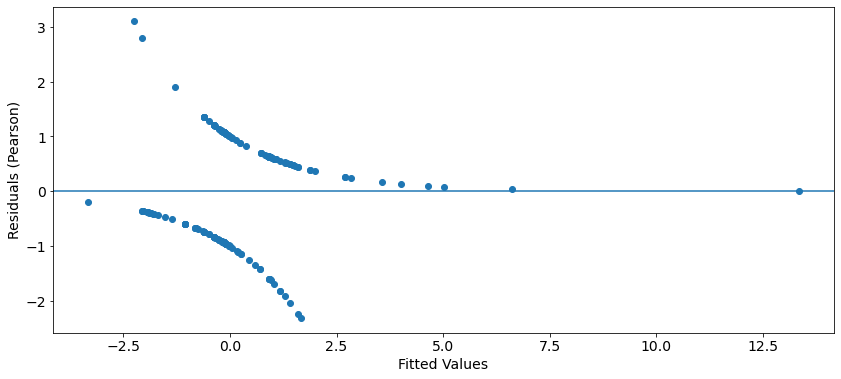

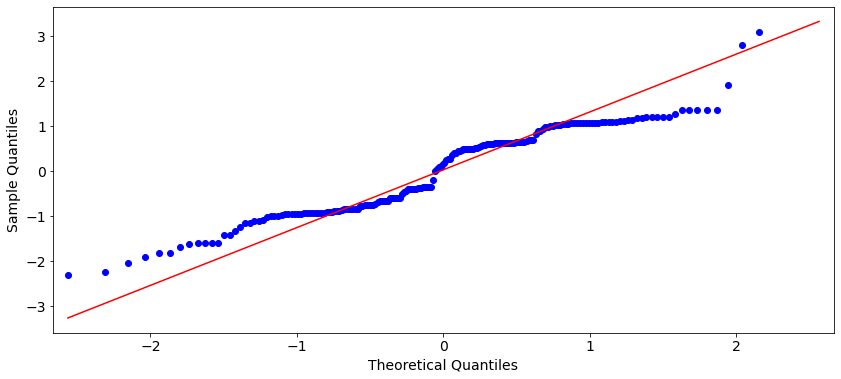

In [68]:
plt.scatter(logit_model.fittedvalues, logit_model.resid_pearson)
plt.ylabel('Residuals (Pearson)')
plt.xlabel('Fitted Values')
plt.axhline(0)
sm.qqplot(logit_model.resid_pearson, line='q')

# Generalised Linear Model

In [ ]:
# Generalised Linear Model
formula = 'illuminated ~ sign + Height + Width + Area'
binomial_model = smf.glm(formula, data=df, family=sm.families.Binomial()).fit()
print(binomial_model.summary())
# print('Exponentiated Parameters:\n', glm_binomial.params)
print('Exponentiated Parameters:\n', np.exp(binomial_model.params))

## Residuals and model checking

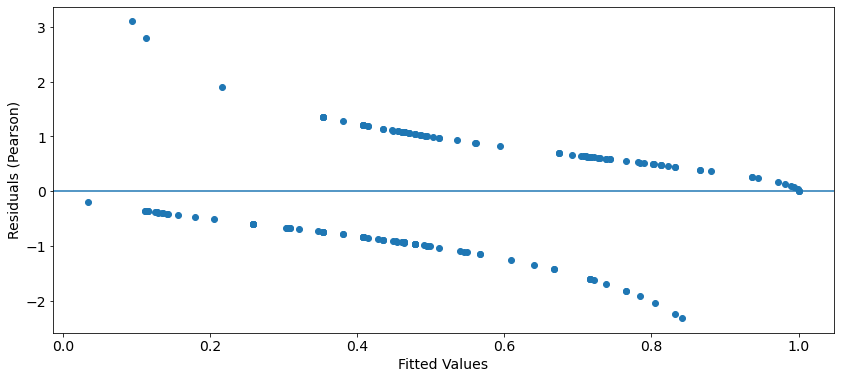

In [69]:
# Residual Pearson vs. Fitted Values
plt.scatter(binomial_model.fittedvalues, binomial_model.resid_pearson)
plt.ylabel('Residuals (Pearson)')
plt.xlabel('Fitted Values')
plt.axhline(0)
#sm.qqplot(binomial_model.resid_pearson, line='q')

/Users/ad/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


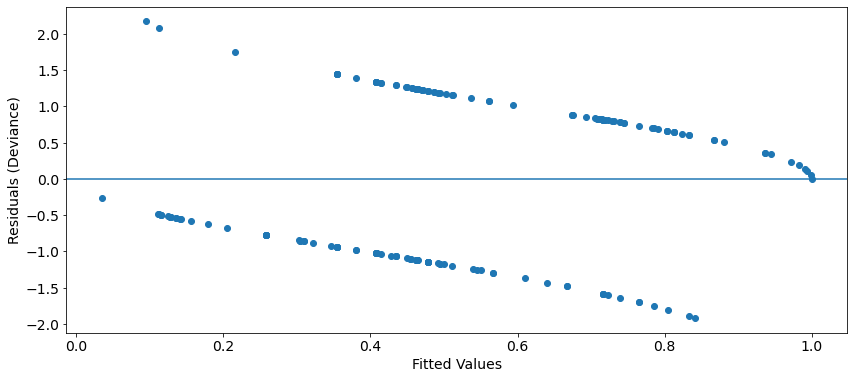

In [70]:
# Residual Deviance vs. Fitted Values
plt.scatter(binomial_model.fittedvalues, binomial_model.resid_deviance)
plt.ylabel('Residuals (Deviance)')
plt.xlabel('Fitted Values')
plt.axhline(0)
#sm.qqplot(binomial_model.resid_deviance, line='q')

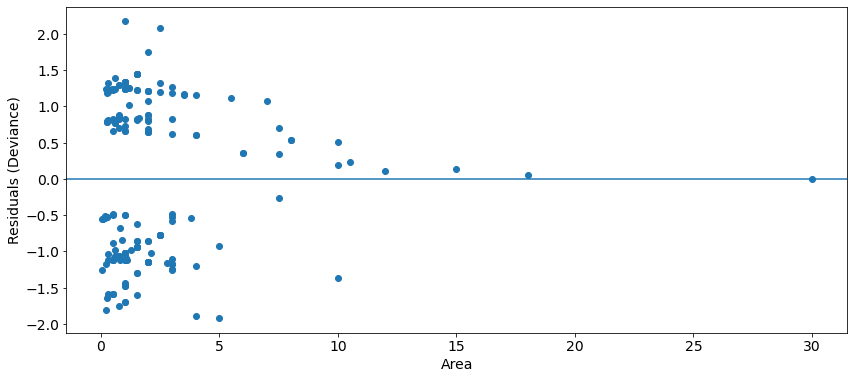

In [71]:
# Residual Deviance vs. Area
plt.scatter(df.Area, binomial_model.resid_deviance)
plt.ylabel('Residuals (Deviance)')
plt.xlabel('Area')
plt.axhline(0)

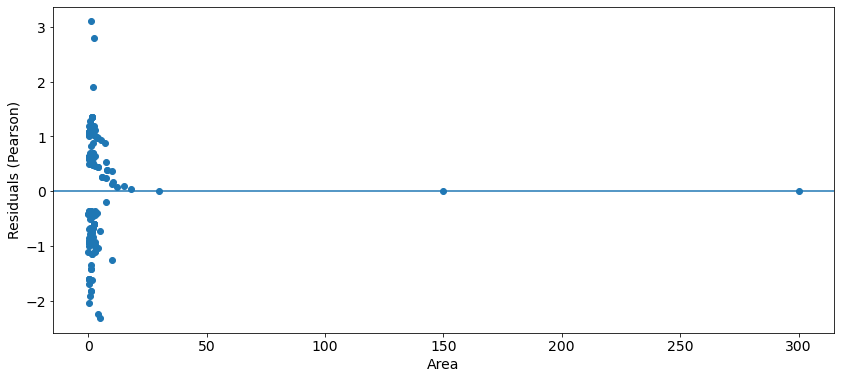

In [72]:
# Pearson Residual vs. Area
plt.scatter(df.Area, binomial_model.resid_pearson)
plt.ylabel('Residuals (Pearson)')
plt.xlabel('Area')
plt.axhline(0)

Both the pearson- and deviance residual vs. fitted variable plots show no significant curvature. The pearson- and deviance residual vs. the Area plots show no systematic pattern either. Hence the model adequately describes the effect of the explanitory variable. However, there are signs of a (slight) change in variance as the former two plots show an increase in spread of the residuals toward the end of the range of fitted values—which indicates a departure from the assumption of constant variance (Dobson, 2002, ss. 2.3.5).  

In [83]:
from scipy import stats

resid = binomial_model.resid_deviance.copy()
resid_std = stats.zscore(resid)
plt.hist(resid_std, bins=25)
plt.set_title('Histogram of standardized deviance residuals')

In [84]:
print('Residuals: \n', binomial_model.resid_deviance)
print('\nResiduals Standardised: \n', stats.zscore(resid))

Residuals: 
 0           NaN
1      0.663254
2           NaN
3      1.021233
4     -1.753760
         ...   
187    1.339597
188   -1.197056
189   -1.140664
190   -1.112888
191   -0.773181
Length: 192, dtype: float64

Residuals Standardised: 
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan n

ValueError: x and y must be the same size

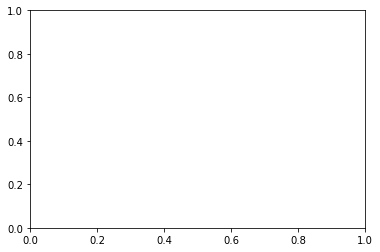

In [8]:
plt.scatter(binomial_model.predict, binomial_model.resid_deviance)
plt.ylabel('Residuals (Deviance)')
plt.xlabel('Predicted Values')
plt.axhline(0)
#sm.qqplot(binomial_model.resid_response, line='q')

In [56]:
#print('Parameters:\n', binomial_model.params)
#print('\nT-values:\n', binomial_model.tvalues)

In [26]:
(binomial_model.predict)

<bound method Results.predict of <statsmodels.genmod.generalized_linear_model.GLMResults object at 0x7f8cbe31f790>>

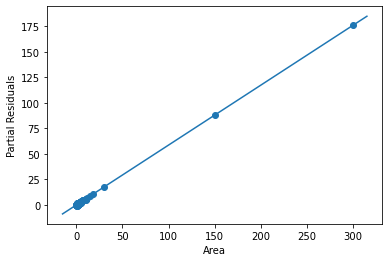

In [41]:
pr = model_full.resid_generalized + df.Area*model_full.params['Area']
plt.scatter(df.Area, pr)
plt.xlabel('Area')
plt.ylabel('Partial Residuals')
xr = np.array(plt.xlim())
plt.plot(xr, xr*model_full.params['Area'])

There are clear signs of nonlinearity!

In [47]:
# Fit Reduced Model
model_red = logit('illuminated ~ sign + Area', data=df).fit()
print(model_red.summary())

Optimization terminated successfully.
         Current function value: 0.595953
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:            illuminated   No. Observations:                  192
Model:                          Logit   Df Residuals:                      187
Method:                           MLE   Df Model:                            4
Date:                Wed, 08 Jun 2022   Pseudo R-squ.:                  0.1385
Time:                        15:50:02   Log-Likelihood:                -114.42
converged:                       True   LL-Null:                       -132.82
Covariance Type:            nonrobust   LLR p-value:                 1.979e-07
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.0626      0.764     -2.700      0.007      -3.560      -0.565
sign[T.cnop

# Impact of predictors on the probability of an outcome

In [ ]:
testdat =df[['sign', 'illuminated', 'Height', 'Width', 'Area']]